In [31]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, ContinuousPeaksGenerator, FlipFlopGenerator, KnapsackGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, SKMLPRunner

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [32]:
SEED = 42
OUTPUT_DIRECTORY = 'results'

# Continuous Peaks

In [33]:
problem = ContinuousPeaksGenerator.generate(seed=SEED, size=30)
experiment_name = 'continuous_peaks30'

In [34]:
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=5000,
                restart_list=[25, 75, 100])  
                
# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

In [35]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000277,38.0,0.0,25,512,0
1,1,0.012225,38.0,1.0,25,512,0
2,2,0.014041,38.0,2.0,25,512,0
3,3,0.015456,38.0,3.0,25,512,0
4,4,0.015480,38.0,4.0,25,512,0
...,...,...,...,...,...,...,...
103934,508,0.052763,56.0,52605.0,100,512,100
103935,509,0.052853,56.0,52606.0,100,512,100
103936,510,0.052942,56.0,52607.0,100,512,100
103937,511,0.053033,56.0,52608.0,100,512,100


In [36]:
rhc_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,38.0,0,0.000277,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
1,1,38.0,1,0.012225,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
2,2,38.0,2,0.014041,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
3,4,38.0,4,0.015480,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
4,8,40.0,9,0.016782,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
...,...,...,...,...,...,...,...,...
2228,32,37.0,52117,543.566041,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...",100,512,100
2229,64,39.0,52151,544.183579,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,512,100
2230,128,42.0,52218,545.108035,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,512,100
2231,256,47.0,52349,546.693303,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,512,100


<AxesSubplot:>

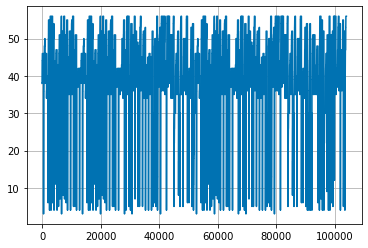

In [37]:
rhc_run_curves['Fitness'].plot()

In [38]:
sa = SARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(14),
                max_attempts=5000,
                temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                decay_list=[mlrose_hiive.GeomDecay])
            
# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

In [39]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000085,38.0,0.0,1,8192
1,1,0.003155,38.0,2.0,1,8192
2,2,0.004787,38.0,3.0,1,8192
3,3,0.006158,38.0,4.0,1,8192
4,4,0.006180,38.0,5.0,1,8192
...,...,...,...,...,...,...
58371,6408,0.317743,56.0,7356.0,10000,8192
58372,6409,0.317933,56.0,7357.0,10000,8192
58373,6410,0.318124,56.0,7358.0,10000,8192
58374,6411,0.318315,56.0,7359.0,10000,8192


<AxesSubplot:>

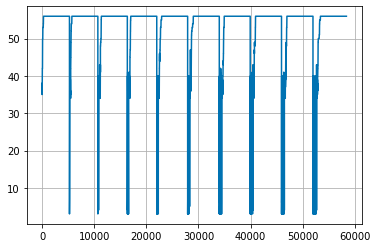

In [40]:
sa_run_curves['Fitness'].plot()

In [41]:
ga = GARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(12),
                max_attempts=1000,
                population_sizes=[150, 200, 300],
                mutation_rates=[0.4, 0.5, 0.6])
                
# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

In [42]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003087,38.0,150.0,150,0.4,2048
1,1,0.009128,41.0,302.0,150,0.4,2048
2,2,0.014111,42.0,454.0,150,0.4,2048
3,3,0.019206,43.0,606.0,150,0.4,2048
4,4,0.022418,44.0,758.0,150,0.4,2048
...,...,...,...,...,...,...,...
9536,1079,0.106150,56.0,325089.0,300,0.6,2048
9537,1080,0.109347,56.0,325390.0,300,0.6,2048
9538,1081,0.112559,56.0,325691.0,300,0.6,2048
9539,1082,0.115763,56.0,325992.0,300,0.6,2048


<AxesSubplot:>

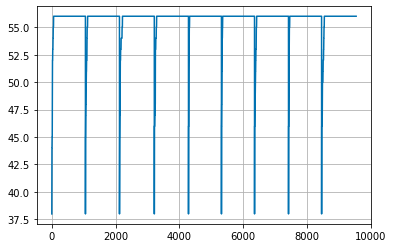

In [43]:
ga_run_curves['Fitness'].plot()

In [44]:
mmc = MIMICRunner(problem=problem,
                    experiment_name=experiment_name,
                    output_directory=OUTPUT_DIRECTORY,
                    seed=SEED,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=500,
                    keep_percent_list=[0.25, 0.5, 0.75],
                    population_sizes=[150, 200, 300])          
# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

In [45]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.002264,38.0,150.0,False,150,0.25,512
1,1,0.113069,39.0,302.0,False,150,0.25,512
2,2,0.230132,46.0,454.0,False,150,0.25,512
3,3,0.349534,47.0,606.0,False,150,0.25,512
4,4,0.465007,49.0,758.0,False,150,0.25,512
...,...,...,...,...,...,...,...,...
4596,508,0.220578,47.0,153213.0,False,300,0.75,512
4597,509,0.334684,47.0,153514.0,False,300,0.75,512
4598,510,0.445810,47.0,153815.0,False,300,0.75,512
4599,511,0.561856,47.0,154116.0,False,300,0.75,512


<AxesSubplot:>

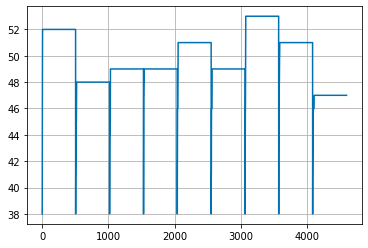

In [46]:
mmc_run_curves['Fitness'].plot()

# Increase Size

In [47]:
problem = ContinuousPeaksGenerator.generate(seed=SEED, size=5)
experiment_name = 'continuous_peaks5'

In [48]:
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=5000,
                restart_list=[25, 75, 100])  
                
# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

In [49]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000083,3.0,0.0,25,512,0
1,1,0.002585,3.0,1.0,25,512,0
2,2,0.003773,3.0,2.0,25,512,0
3,3,0.004842,5.0,4.0,25,512,0
4,4,0.004857,5.0,5.0,25,512,0
...,...,...,...,...,...,...,...
103934,508,0.039210,8.0,51832.0,100,512,100
103935,509,0.039293,8.0,51833.0,100,512,100
103936,510,0.039377,8.0,51834.0,100,512,100
103937,511,0.039460,8.0,51835.0,100,512,100


In [50]:
rhc_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,3.0,0,0.000083,"[0, 1, 0, 0, 0]",25,512,0
1,1,3.0,1,0.002585,"[0, 1, 0, 0, 0]",25,512,0
2,2,3.0,2,0.003773,"[0, 1, 0, 0, 0]",25,512,0
3,4,5.0,5,0.004857,"[0, 0, 0, 0, 0]",25,512,0
4,8,5.0,9,0.005929,"[0, 0, 0, 0, 0]",25,512,0
...,...,...,...,...,...,...,...,...
2228,32,8.0,51356,502.720172,"[1, 1, 1, 0, 0]",100,512,100
2229,64,8.0,51388,503.347422,"[1, 1, 1, 0, 0]",100,512,100
2230,128,8.0,51452,504.241126,"[1, 1, 1, 0, 0]",100,512,100
2231,256,8.0,51580,505.780137,"[1, 1, 1, 0, 0]",100,512,100


<AxesSubplot:>

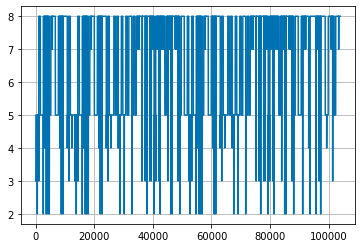

In [51]:
rhc_run_curves['Fitness'].plot()

In [52]:
sa = SARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(14),
                max_attempts=5000,
                temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                decay_list=[mlrose_hiive.GeomDecay])
            
# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

In [53]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000085,3.0,0.0,1,8192
1,1,0.003921,3.0,1.0,1,8192
2,2,0.006201,5.0,3.0,1,8192
3,3,0.007670,5.0,4.0,1,8192
4,4,0.007689,5.0,5.0,1,8192
...,...,...,...,...,...,...
81925,8188,5.147077,8.0,10463.0,10000,8192
81926,8189,5.148315,8.0,10464.0,10000,8192
81927,8190,5.149529,8.0,10466.0,10000,8192
81928,8191,5.150808,8.0,10467.0,10000,8192


<AxesSubplot:>

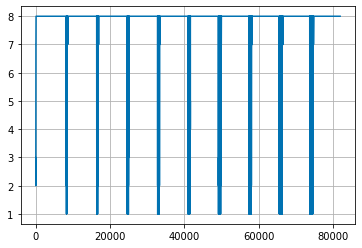

In [54]:
sa_run_curves['Fitness'].plot()

In [55]:
ga = GARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(12),
                max_attempts=1000,
                population_sizes=[150, 200, 300],
                mutation_rates=[0.4, 0.5, 0.6])
                
# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

In [56]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001328,3.0,150.0,150,0.4,2048
1,1,0.008107,8.0,302.0,150,0.4,2048
2,2,0.012603,8.0,453.0,150,0.4,2048
3,3,0.016627,8.0,604.0,150,0.4,2048
4,4,0.019191,8.0,755.0,150,0.4,2048
...,...,...,...,...,...,...,...
9013,997,2.708511,8.0,300398.0,300,0.6,2048
9014,998,2.711267,8.0,300699.0,300,0.6,2048
9015,999,2.713968,8.0,301000.0,300,0.6,2048
9016,1000,2.716703,8.0,301301.0,300,0.6,2048


<AxesSubplot:>

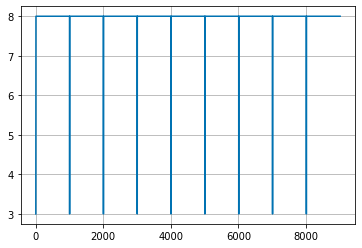

In [57]:
ga_run_curves['Fitness'].plot()

In [58]:
mmc = MIMICRunner(problem=problem,
                    experiment_name=experiment_name,
                    output_directory=OUTPUT_DIRECTORY,
                    seed=SEED,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=500,
                    keep_percent_list=[0.25, 0.5, 0.75],
                    population_sizes=[150, 200, 300])          
# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

In [59]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.002037,3.0,150.0,False,150,0.25,512
1,1,0.014831,8.0,302.0,False,150,0.25,512
2,2,0.020237,8.0,453.0,False,150,0.25,512
3,3,0.025380,8.0,604.0,False,150,0.25,512
4,4,0.029199,8.0,755.0,False,150,0.25,512
...,...,...,...,...,...,...,...,...
4513,497,1.708171,8.0,149898.0,False,300,0.75,512
4514,498,1.711411,8.0,150199.0,False,300,0.75,512
4515,499,1.714657,8.0,150500.0,False,300,0.75,512
4516,500,1.717910,8.0,150801.0,False,300,0.75,512


<AxesSubplot:>

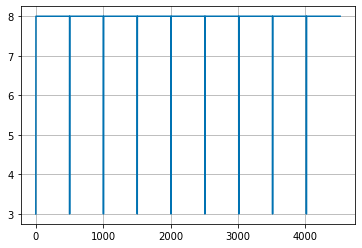

In [60]:
mmc_run_curves['Fitness'].plot()